In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [18]:
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

In [20]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [21]:
train_NaTransport = train.drop("Transported", axis=1)
features = pd.concat([train_NaTransport, test])

<Axes: >

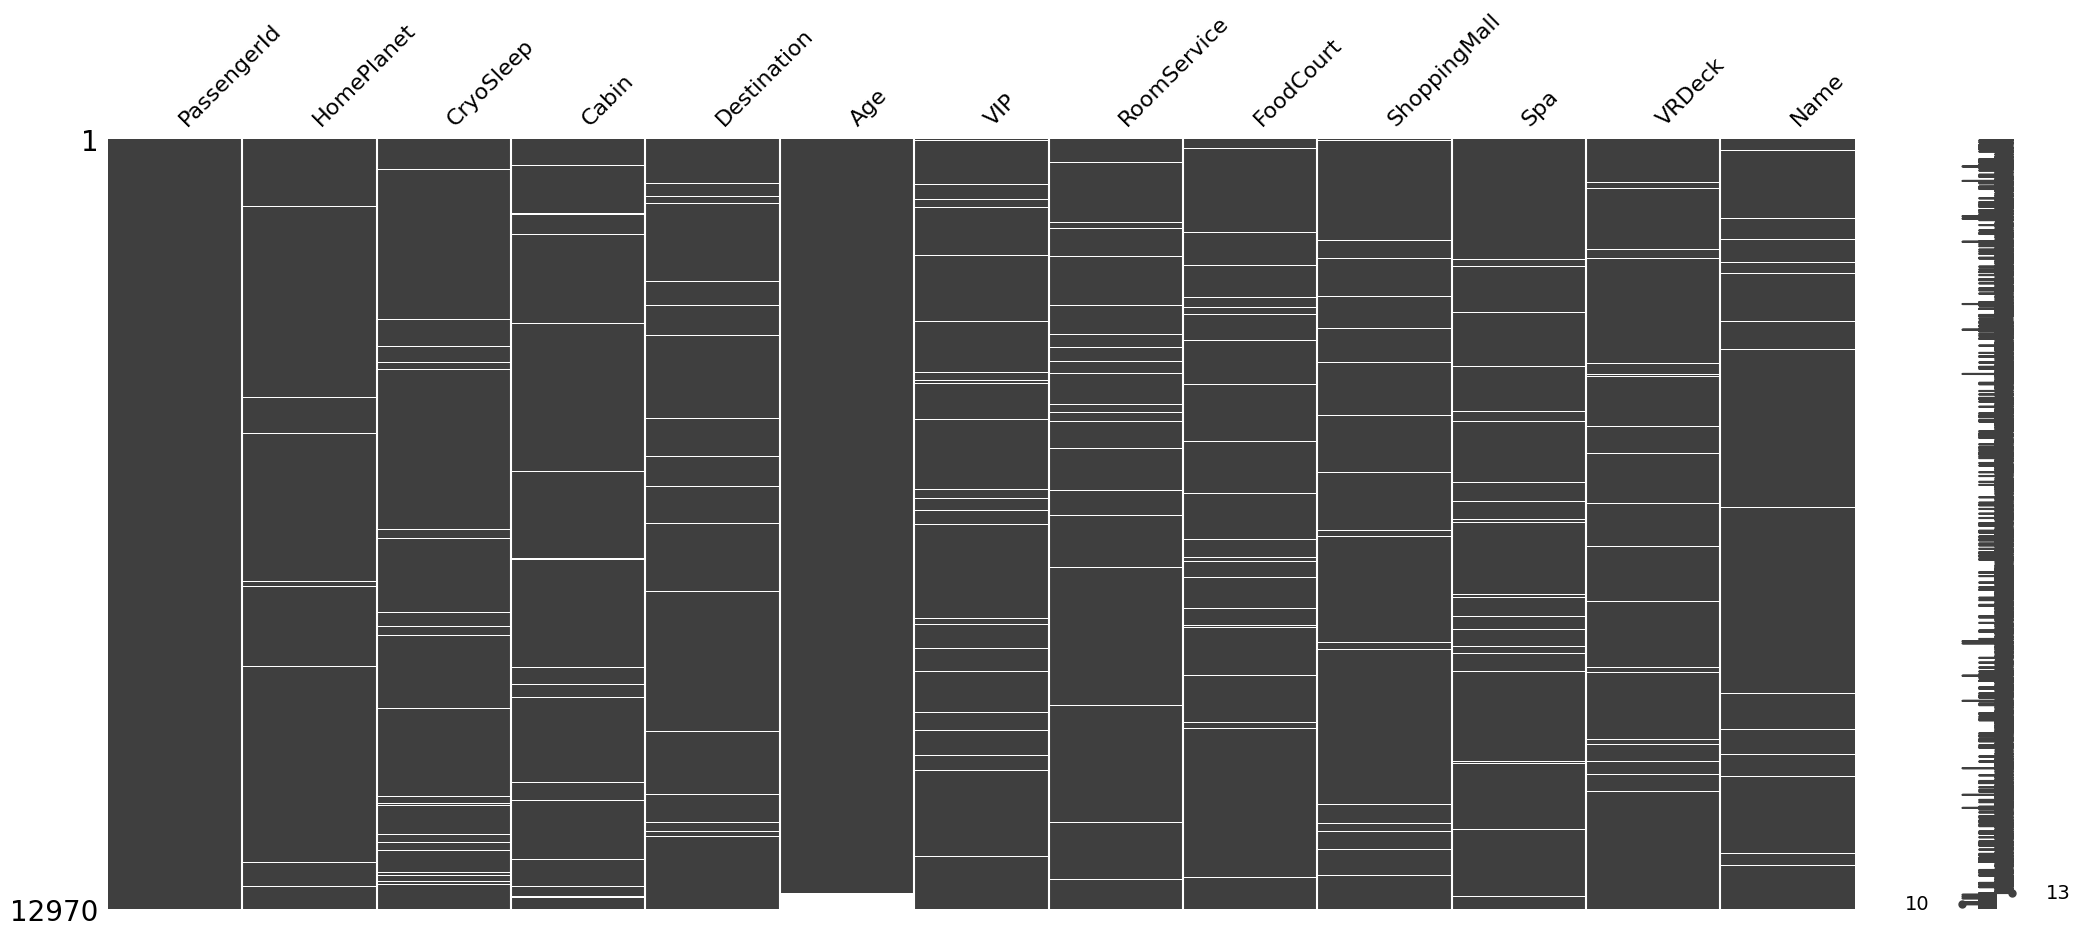

In [22]:
features = features.sort_values('Age')
msno.matrix(features)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



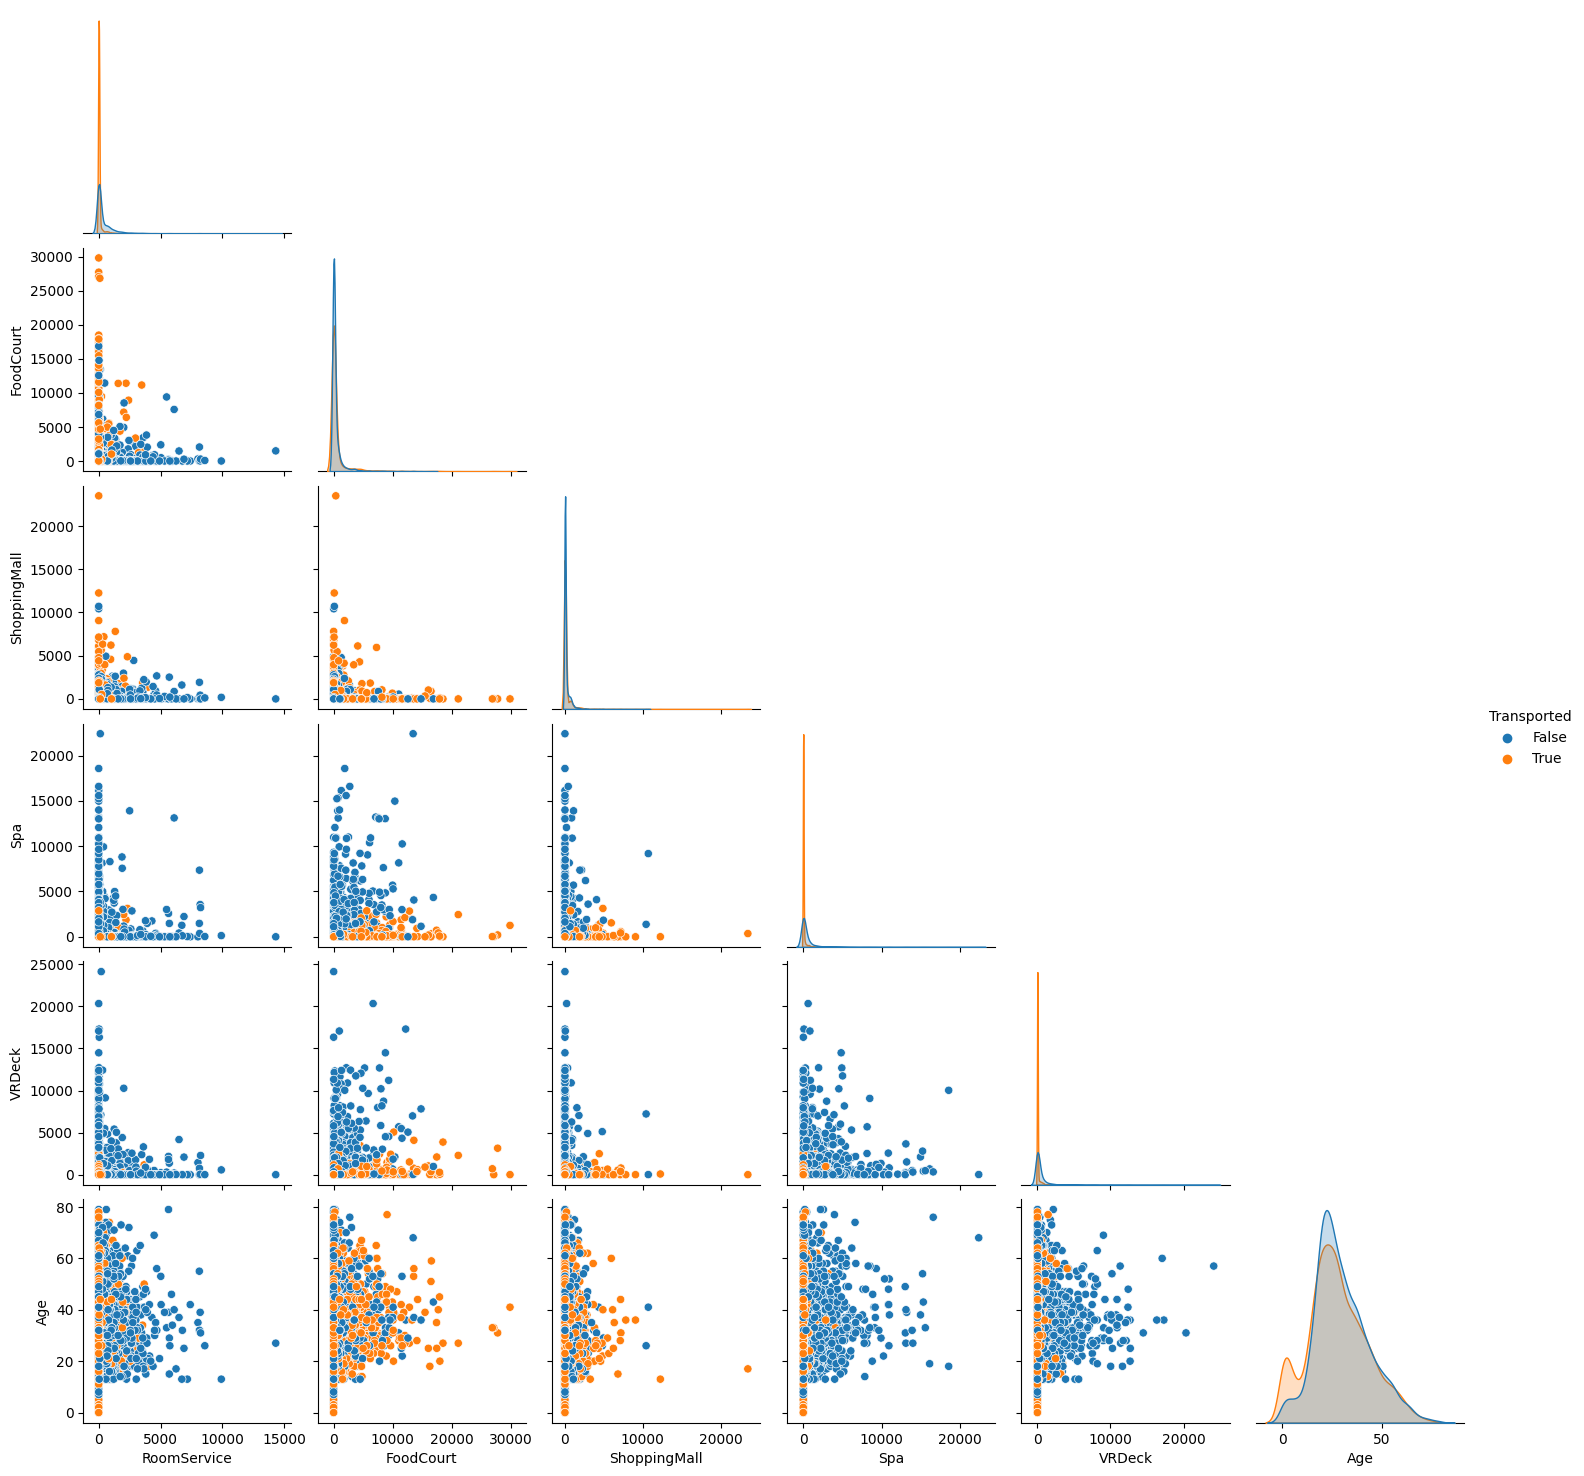

In [23]:
sns.pairplot(data=train, kind="scatter", hue="Transported", diag_kind="auto", corner=True, 
            x_vars=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Age'],
            y_vars=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Age']);

In [24]:
import plotly.express as ex
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

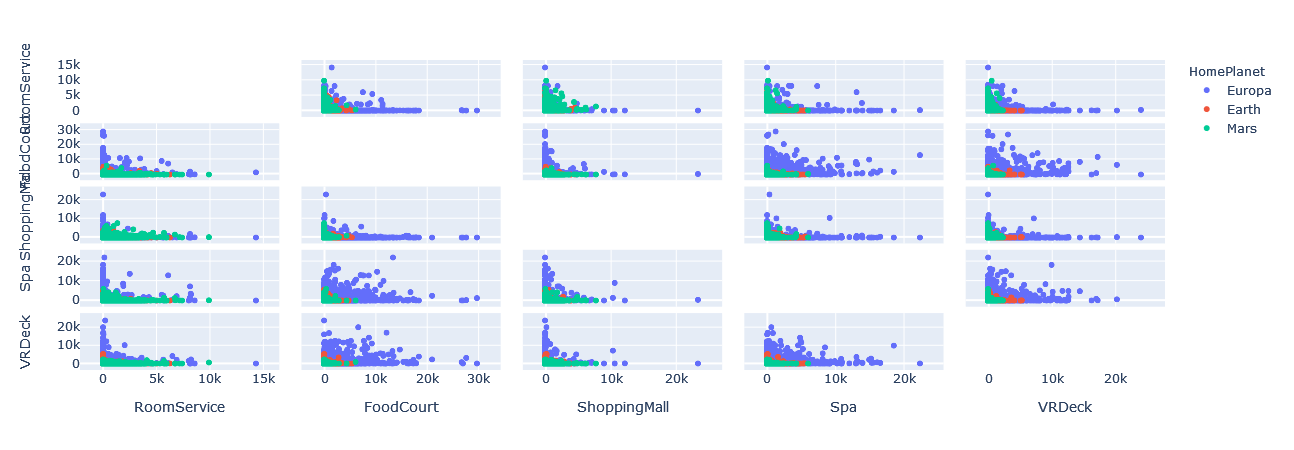

In [25]:
df = train
features = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]

fig = px.scatter_matrix(
    df,
    dimensions = features,
    color = "HomePlanet"
)

fig.update_traces(diagonal_visible=False)
fig.show()

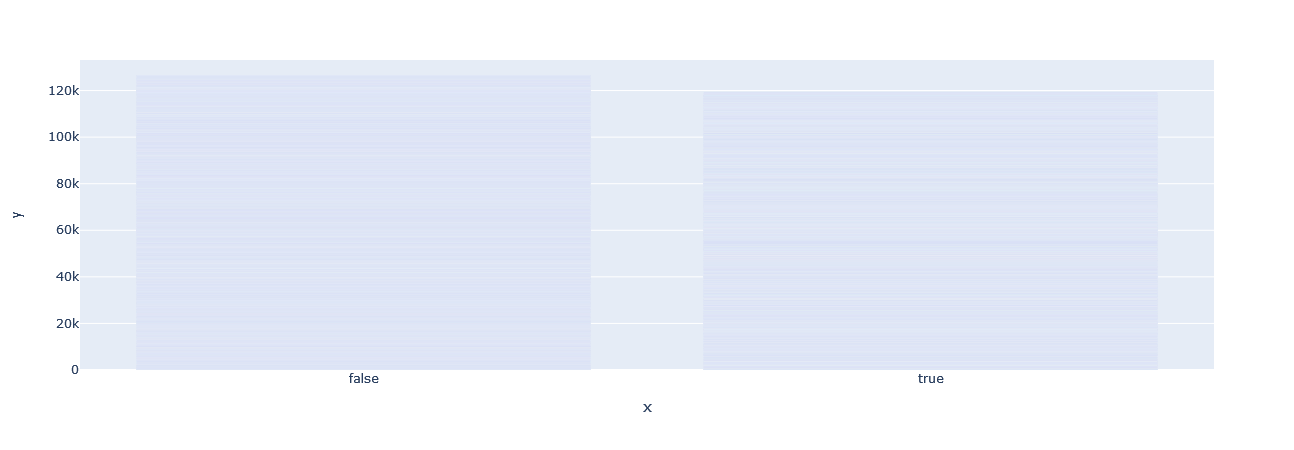

In [30]:
fig = px.bar(x=train["Transported"], y=train["Age"])
fig.show()